In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
from pylamp.neural.layers import Linear
from pylamp.neural.activations import Sigmoid, TanH
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import BCELoss
from pylamp.utils.data import DataGenerator as dg 
from pylamp.neural.sequentiel import Sequentiel
from pylamp.optim.optimizer import Optim

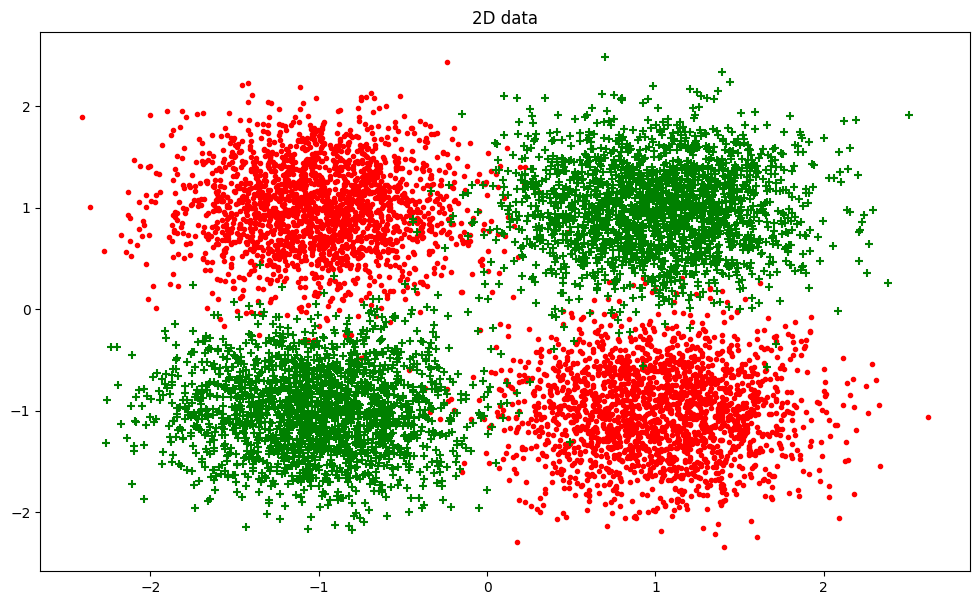

In [3]:
X_train, X_test, y_train, y_test  = dg.generate_2D_data(data_type=1, epsilon=0.3, train_size=0.8, nbex=10000)
dg.plot_2D_data(X_train, y_train)

In [4]:
# Create a sequential model
model = Sequentiel()

# Add modules to the sequential model
model.add_module(Linear(input_size=2, output_size=8))
model.add_module(TanH())
model.add_module(Linear(input_size=8, output_size=1))
model.add_module(Sigmoid())

loss_func = BCELoss()

optimizer = Optim(model,loss_func,1e-2)

batch_size = 100
epochs = 1000

losses = SGD(optimizer,X_train, y_train, batch_size,epochs,verbose=True)


Epoch 1/1000, Average Loss: 0.9373883424470476
Epoch 101/1000, Average Loss: 0.08041781812435196
Epoch 201/1000, Average Loss: 0.06728754500918753
Epoch 301/1000, Average Loss: 0.06361746903508247
Epoch 401/1000, Average Loss: 0.06200817674368161
Epoch 501/1000, Average Loss: 0.06115870745330999
Epoch 601/1000, Average Loss: 0.06064598556682806
Epoch 701/1000, Average Loss: 0.06030324297629415
Epoch 801/1000, Average Loss: 0.06004860834841935
Epoch 901/1000, Average Loss: 0.05984715514963227
Training finished.


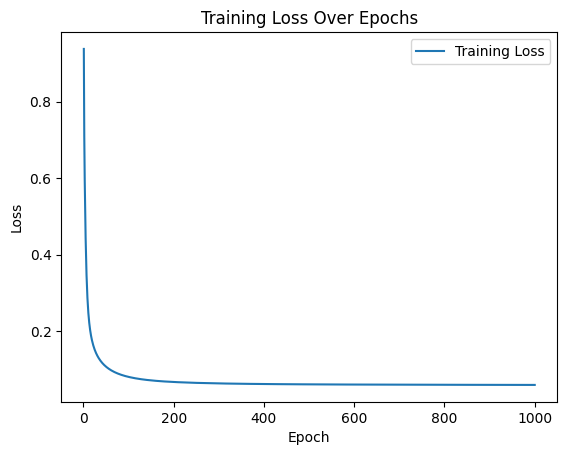

In [5]:
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

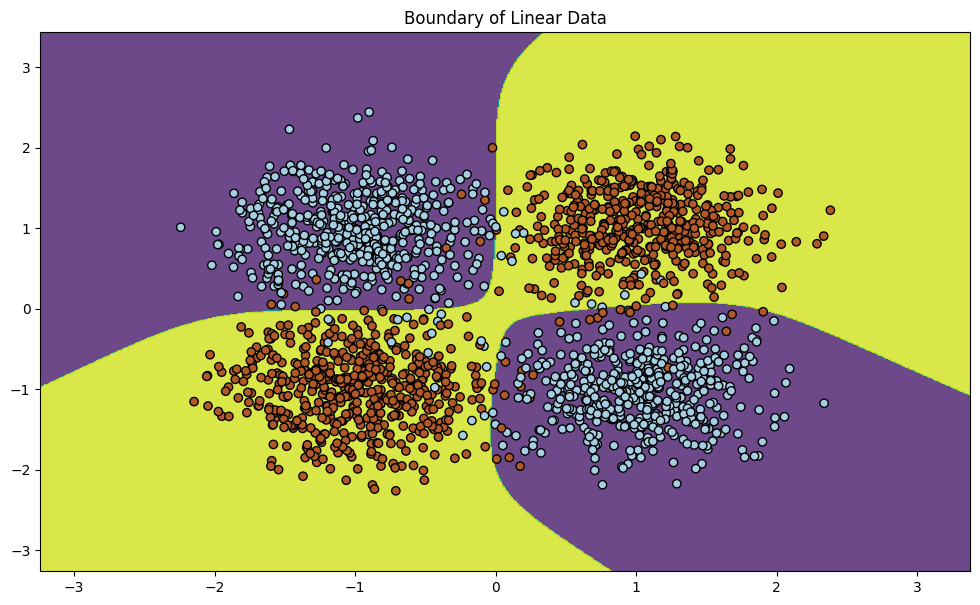

In [6]:
dg.plot_decision_boundary(X_test, y_test, model, "Boundary of Linear Data")
